<a href="https://colab.research.google.com/github/AishahZulkifli/STQD6014-Data-Science/blob/main/Project_1_P132840.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment_1_P132840**



# **1. Upload and import files**

In [2]:
# Upload files
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv')
# Check summary of the data
print(data.describe())

# Check the first few rows of the dataset
print(data.head())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16    

In [4]:
# Conversion rate from USD to RM
conversion_rate = 4.4

# Convert 'Annual Income (k$)' to RM
data['Annual Income (RM)'] = data['Annual Income (k$)'] * conversion_rate * 1000  # Multiply by 1000 to convert k$ to $

# Drop the old 'Annual Income (k$)' column because we no longer need it
data.drop('Annual Income (k$)', axis=1, inplace=True)

# Check the updated DataFrame to see the new 'Annual Income (RM)' column
print(data.head())

   CustomerID  Gender  Age  Spending Score (1-100)  Annual Income (RM)
0           1    Male   19                      39             66000.0
1           2    Male   21                      81             66000.0
2           3  Female   20                       6             70400.0
3           4  Female   23                      77             70400.0
4           5  Female   31                      40             74800.0


# **2. Exploratory Data Analysis (EDA)**

**2.1 Initial Data Inspection**

We'll check for the following:

**Missing Values**: Identify if there are any missing values in the dataset.

**Data Types**: Ensure each column has the appropriate data type for the analysis.

In [5]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

CustomerID                0
Gender                    0
Age                       0
Spending Score (1-100)    0
Annual Income (RM)        0
dtype: int64
CustomerID                  int64
Gender                     object
Age                         int64
Spending Score (1-100)      int64
Annual Income (RM)        float64
dtype: object


There are no missing values in the dataset, which is good as it simplifies the preprocessing stage.
The data types are appropriate for each feature, with Gender as an object (categorical) and other features like Age, Annual Income, and Spending Score as integers.

**2.2 Data Visualization**\
Visualizing the data can help us understand distributions and spot any obvious trends or outliers.

**2.2.1 Histograms**\
Useful to see the distribution of numerical variables.

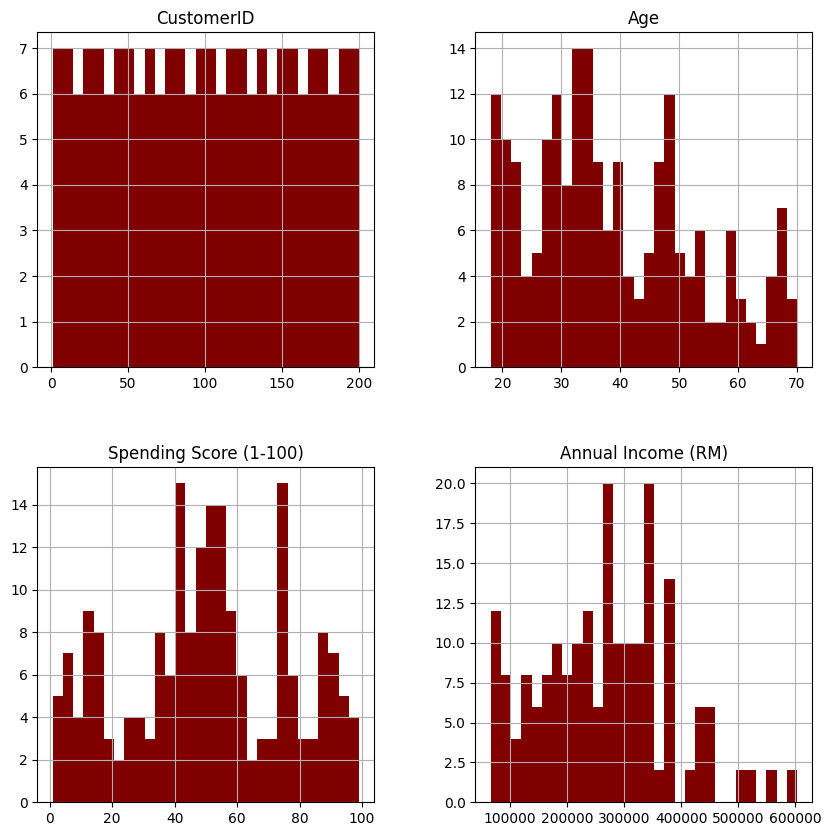

In [8]:
import matplotlib.pyplot as plt

# Plotting histograms for all numerical columns
data.hist(bins=30, figsize=(10, 10), color='maroon')
plt.show()

Age: The distribution is somewhat right-skewed, suggesting a younger customer spending more in the mall.

Annual Income: Appears to be roughly normally distributed but with a slight right skew.

Spending Score: The distribution is fairly uniform, indicating varied spending behaviors across customers.

**2.2.2 Box plots**\
It is for detecting outliers.

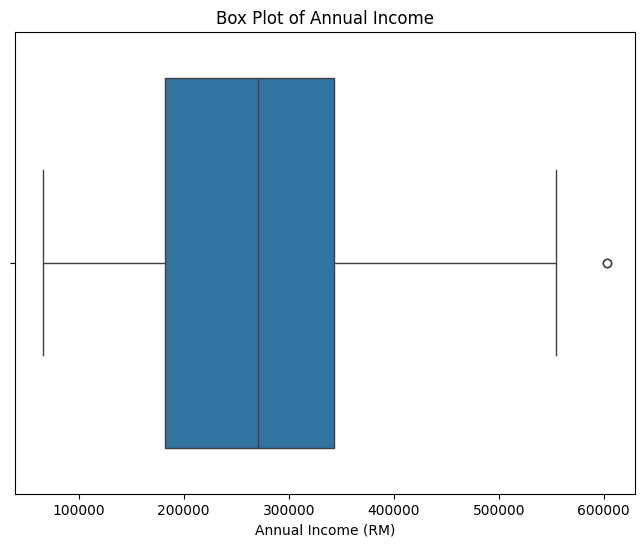

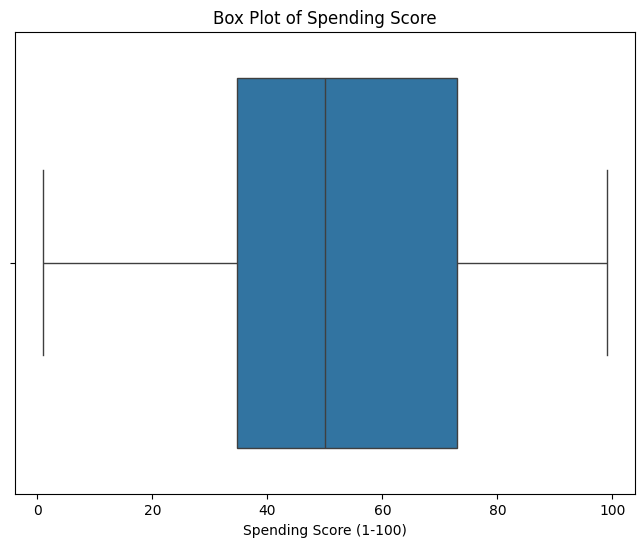

In [11]:
# Box plot for Annual Income
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Annual Income (RM)'])
plt.title('Box Plot of Annual Income')
plt.show()

# Box plot for Spending Score
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Box Plot of Spending Score')
plt.show()

Annual Income: There are a few outliers on the higher end, which could represent high-income customers.

Spending Score: No significant outliers, indicating that most customer spending scores are within a reasonable range of each other.

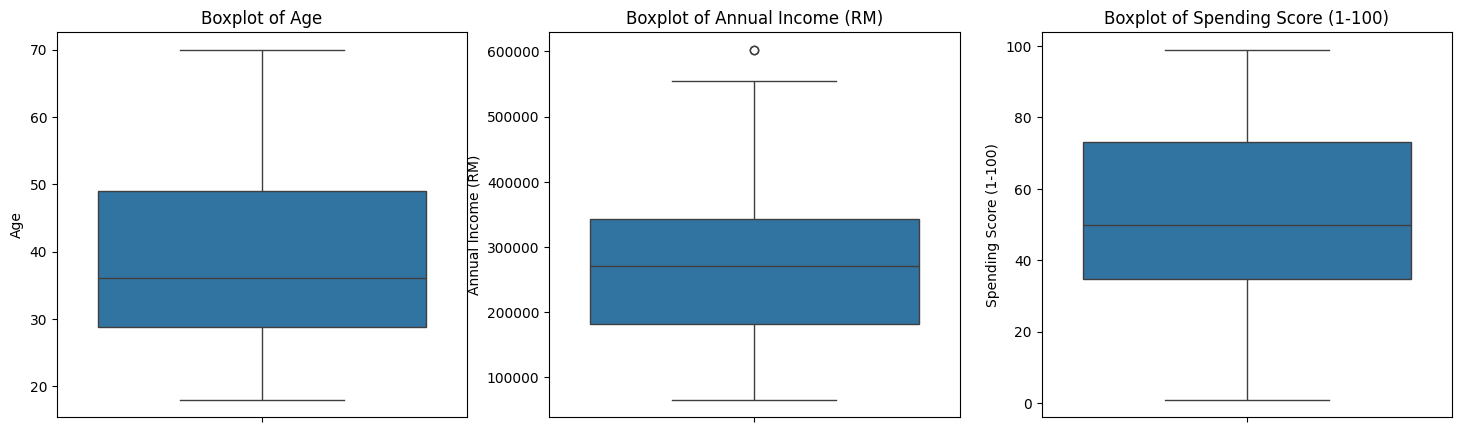

In [10]:
# Visualize potential outliers using boxplots
plt.figure(figsize=(18, 5))
for i, col in enumerate(['Age', 'Annual Income (RM)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.show()


From the boxplots it is shown:

Age: There are no apparent outliers in the age distribution.\
Annual Income: There are a few high-income outliers.\
Spending Score: No significant outliers; the distribution is relatively even.

**2.2.3 Bar Plots**\
Useful for categorical data like Gender.

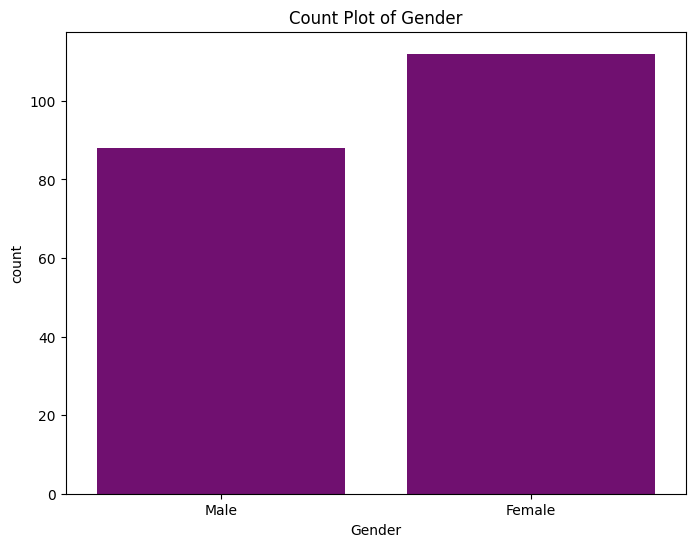

In [9]:
# Count plot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, color='purple')
plt.title('Count Plot of Gender')
plt.show()

From the plot, we can see that more female customers than male, which could influence certain marketing strategies or segment approaches.

**2.2.4 Pair Plots**\
Show relationships between numerical features.


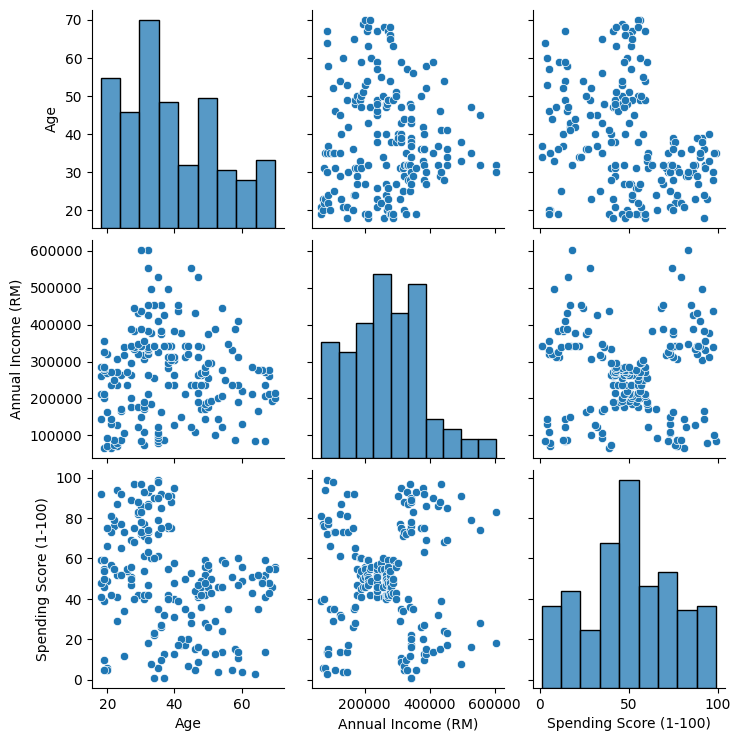

In [12]:
# Pair plots for selected numerical features
sns.pairplot(data[['Age', 'Annual Income (RM)', 'Spending Score (1-100)']])
plt.show()

The scatter plots and histograms in the pair plot suggest some clusters might be formed between annual income and spending score. These clusters can be crucial for segmenting customers based on their spending habits and income levels.

# **3. Segmentation Using Clustering**


Clustering analysis using K-means, which will help us segment the customers based on their "Annual Income" and "Spending Score". This method is commonly used for market segmentation because it's straightforward and effective at finding customer groups based on specified features.

In [13]:
from sklearn.preprocessing import StandardScaler

# Selecting the features for clustering
features = data[['Annual Income (RM)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**3.1 Applying the Elbow Method**\
The Elbow Method helps determine the optimal number of clusters by fitting the model with a range of values for K and plotting the Within-Cluster Sum of Squares (WCSS).

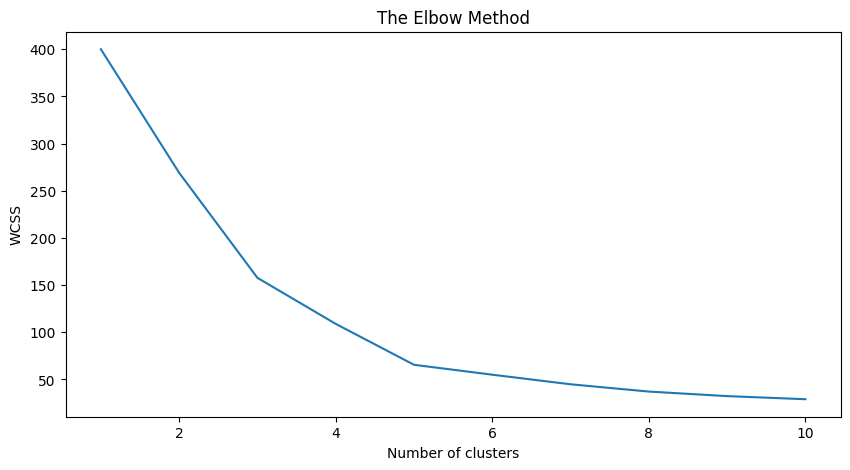

In [14]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The "elbow" of the plot is around 5 clusters. This is where the drop in WCSS starts to slow down. Beyond 5 clusters, adding more doesn't really reduce the WCSS by much. Choosing 5 clusters seems best because it balances the number of clusters with the WCSS well. Adding more clusters after this might not make the clusters much better.

In [15]:
# Assuming the elbow point is at k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original data
data['Cluster'] = clusters

# Viewing the clustered data
print(data.head())

   CustomerID  Gender  Age  Spending Score (1-100)  Annual Income (RM)  \
0           1    Male   19                      39             66000.0   
1           2    Male   21                      81             66000.0   
2           3  Female   20                       6             70400.0   
3           4  Female   23                      77             70400.0   
4           5  Female   31                      40             74800.0   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


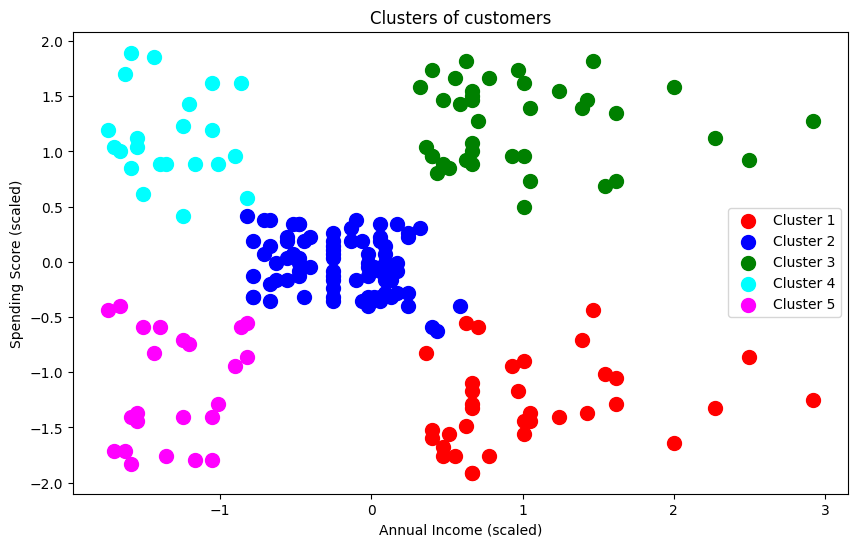

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[clusters == 0, 0], scaled_features[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_features[clusters == 1, 0], scaled_features[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_features[clusters == 2, 0], scaled_features[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_features[clusters == 3, 0], scaled_features[clusters == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(scaled_features[clusters == 4, 0], scaled_features[clusters == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

Based on the K-means clustering results of the customer data, below I provided a summary interpretation of each cluster:

**Cluster 1: Cautious Spenders**\
They earn less and spend less.These customers are careful with their money, likely due to tight budgets. They mainly buy things they really need.Offer them low-cost products and deals. Point out sales and discounts that are great value.

**Cluster 2: Average Consumers**\
They earn a medium amount and spend a medium amount. This group probably represents the typical shoppers. They spend as most people do. Use normal marketing campaigns. Mix promotions for daily items and some special treats.

**Cluster 3: Premium Customers**\
They earn a lot and spend a lot. These shoppers buy expensive items freely because they can afford it. Give them special deals and promotions on luxury products. Offer loyalty programs with unique benefits.

**Cluster 4: High Earners, Low Spenders**\
They earn a lot but spend little. Even with high incomes, these customers keep their spending low. They might be saving a lot or very choosy. Send them personalized marketing that emphasizes product value and quality. Offer exclusive memberships or rewards that encourage spending.

**Cluster 5: Aspirational Spenders**\
They earn less but spend more. These might be younger customers starting their careers. They spend a lot on the latest trends or social activities. Focus on fashionable and affordable items. Use marketing that highlights style and social status, and offer credit options.



# **4. Deepening the Cluster Analysis**

**4.1 Profile Each Cluster Further**

Age Distribution within Each Cluster

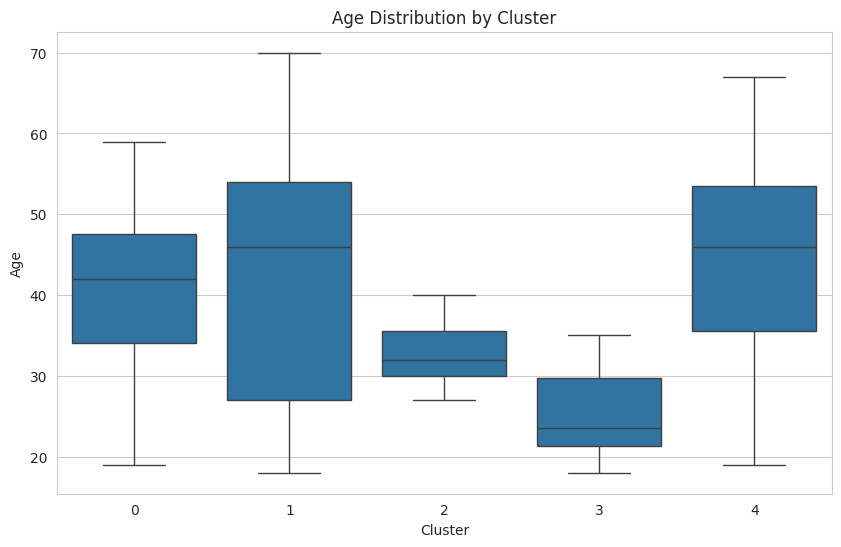

In [17]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting age distribution within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

*   Cluster 0 contains individuals mostly between 40 and 50 years old, suggesting they are mature adults likely with stable financial resources.
*   Cluster 1 features a younger demographic, ranging from 20 to 40 years old. This group may be more dynamic and receptive to current trends.
*   Cluster 2 predominantly includes very young individuals, mostly early 20s, possibly students or early career stage, with discretionary spending habits.
*   Cluster 3 consists of a middle-aged group, about 35-55 years, often with significant purchasing power due to career advancement.
*   Cluster 4 is characterized by older individuals, mostly over 55, likely retirees or seniors with specific needs related to healthcare and value for money.






Gender Distribution within Each Cluster

Gender   Female  Male
Cluster              
0            16    19
1            48    33
2            21    18
3            13     9
4            14     9


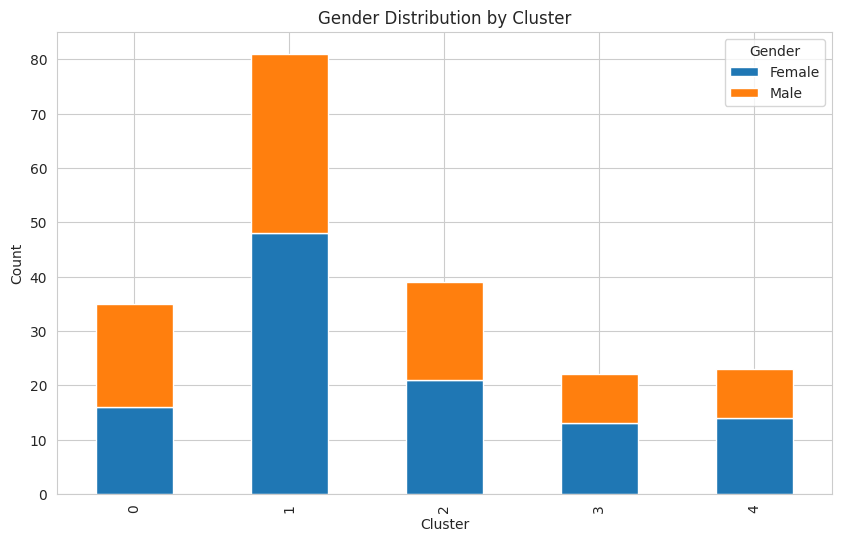

In [18]:
# Count of each gender within each cluster
gender_distribution = pd.crosstab(data['Cluster'], data['Gender'])
print(gender_distribution)

# Plotting gender distribution within each cluster
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

*   Cluster 0 shows a balanced mix of genders with a slight female majority, suggesting a diverse target market.

*   Cluster 1 is predominantly female, indicating a potential focus on products and services favored by women.

*   Cluster 2 has an even distribution of genders, suitable for general marketing strategies.

*   Cluster 3 features more males than females, which may influence the types of products that are popular within this cluster.

*   Cluster 4 is mainly composed of females, particularly older women, hinting at the effectiveness of targeting products for female senior citizens.

Average Annual Income and Spending Score

         Annual Income (RM)  Spending Score (1-100)
Cluster                                            
0             388080.000000               17.114286
1             243303.703704               49.518519
2             380769.230769               82.128205
3             113200.000000               79.363636
4             115739.130435               20.913043


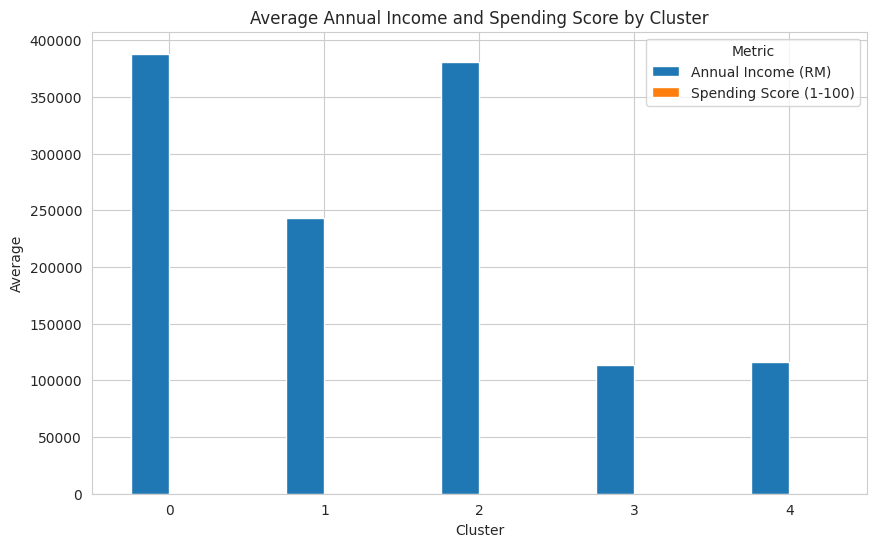

In [19]:
# Calculating average annual income and spending score for each cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (RM)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

# Plotting the averages
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Average Annual Income and Spending Score by Cluster')
plt.xlabel('Cluster')
plt.xticks(rotation=0)  # Rotates labels to make them readable
plt.ylabel('Average')
plt.legend(title='Metric')
plt.show()  # Displays the plot
plt.show()


*   Cluster 0 has a high average income but a low spending score, indicating these individuals are conservative spenders despite their wealth, possibly focusing on saving.

*   Cluster 1 members have lower income yet moderate spending habits, suggesting they might prioritize lifestyle spending despite limited resources.

*   Cluster 2, with the lowest income and very high spending scores, could represent individuals living beyond their means, potentially young professionals who enjoy lifestyle products and credit options.

*   Cluster 3, having moderate income and the highest spending scores, seems to seek premium products and experiences, highlighting an opportunity to market high-quality and exclusive items.

*   Cluster 4, with very low income and moderate spending scores, likely focuses on essential products and affordable luxuries, suitable for marketing necessary and health-oriented goods.

In [21]:
# Display descriptive statistics for each cluster
cluster_descriptive_stats = data.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual Income (RM)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std']
})
print(cluster_descriptive_stats)

               Age                   Annual Income (RM)            \
              mean median        std               mean    median   
Cluster                                                             
0        41.114286   42.0  11.341676      388080.000000  374000.0   
1        42.716049   46.0  16.447822      243303.703704  237600.0   
2        32.692308   32.0   3.728650      380769.230769  347600.0   
3        25.272727   23.5   5.257030      113200.000000  107800.0   
4        45.217391   46.0  13.228607      115739.130435  110000.0   

                      Spending Score (1-100)                    
                  std                   mean median        std  
Cluster                                                         
0        72155.896583              17.114286   16.0   9.952154  
1        39547.681488              49.518519   50.0   6.530909  
2        71774.933881              82.128205   83.0   9.364489  
3        33293.614431              79.363636   77.0  10.5

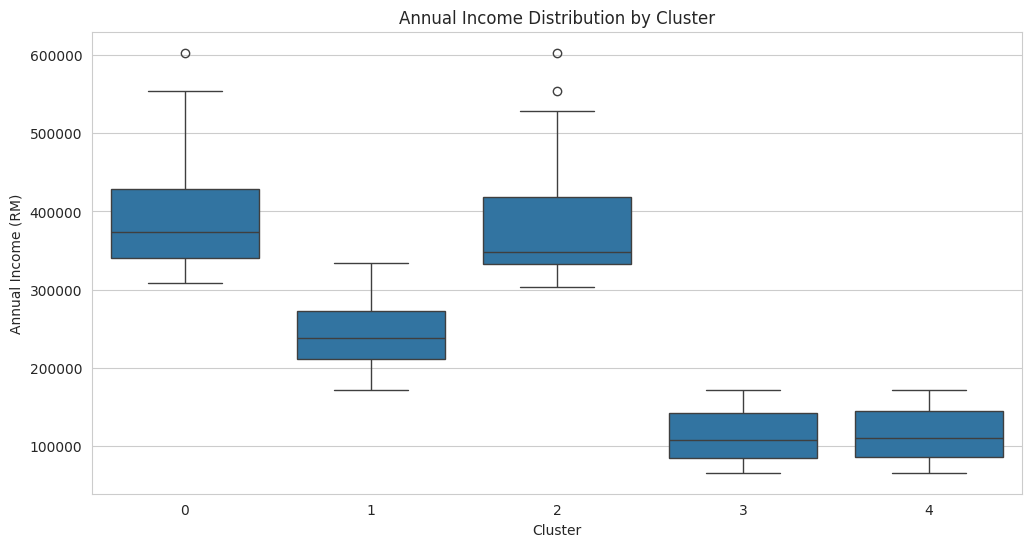

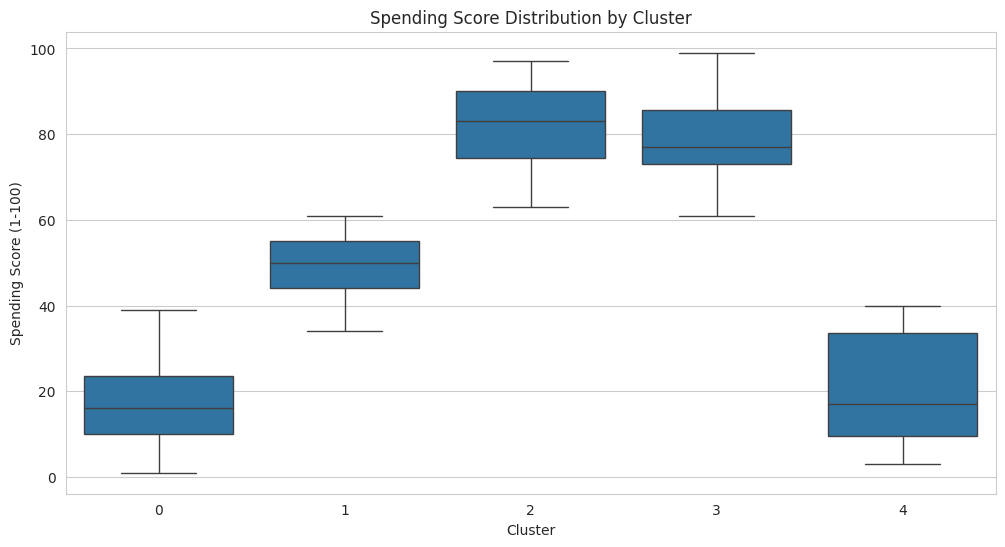

In [24]:
# Boxplot for Annual Income by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Annual Income (RM)', data=data)
plt.title('Annual Income Distribution by Cluster')
plt.show()

# Boxplot for Spending Score by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Spending Score Distribution by Cluster')
plt.show()